# IMPORTACIÓN DEL DATA SET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score,precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from sklearn.manifold import TSNE
#from sklearn.datasets import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalFocalCrossentropy, CategoricalCrossentropy
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap


In [2]:
Direct=os.path.join(os.getcwd(),'trainingset_v1d1_metadata.csv')
df=pd.DataFrame(pd.read_csv(Direct))

# VISUALIZACIÓN DE DATOS


In [ ]:

print('*'*50)
print('*'*50)
display(df.info()) #visualización generalizada del data set
print('*'*50)
print('*'*50)
print("CANTIDAD DE FILAS Y COLUMNAS")
df.shape

**************************************************
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_time       7966 non-null   float64
 1   ifo              7966 non-null   object 
 2   peak_time        7966 non-null   int64  
 3   peak_time_ns     7966 non-null   int64  
 4   start_time       7966 non-null   int64  
 5   start_time_ns    7966 non-null   int64  
 6   duration         7966 non-null   float64
 7   search           7966 non-null   object 
 8   process_id       7966 non-null   int64  
 9   event_id         7966 non-null   int64  
 10  peak_frequency   7966 non-null   float64
 11  central_freq     7966 non-null   float64
 12  bandwidth        7966 non-null   float64
 13  channel          7966 non-null   object 
 14  amplitude        7966 non-null   float64
 15  snr 

None

**************************************************
**************************************************
CANTIDAD DE FILAS Y COLUMNAS


(7966, 28)

In [ ]:
df.isnull().sum()   # No hay valores nulos  

event_time         0
ifo                0
peak_time          0
peak_time_ns       0
start_time         0
start_time_ns      0
duration           0
search             0
process_id         0
event_id           0
peak_frequency     0
central_freq       0
bandwidth          0
channel            0
amplitude          0
snr                0
confidence         0
chisq              0
chisq_dof          0
param_one_name     0
param_one_value    0
gravityspy_id      0
label              0
sample_type        0
url1               0
url2               0
url3               0
url4               0
dtype: int64

In [ ]:
# Visualización completa de las columnas del data set
pd.set_option('display.max_columns',None)
# no haya limite en mostrar la cantidad de columnas
y=df.head() # muestra de las primero cinco filas del conjunto de datos
y.to_csv('Head del data set.csv',index=False)
display(y)

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,peak_frequency,central_freq,bandwidth,channel,amplitude,snr,confidence,chisq,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,1337.695312,1120.043213,573.363953,GDS-CALIB_STRAIN,1.197650e-22,7.51139,0,0,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,654.747681,1823.073364,3426.576416,GDS-CALIB_STRAIN,8.255850e-23,9.63013,0,0,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,1337.827515,2024.177490,3778.701904,GDS-CALIB_STRAIN,9.762940e-22,15.37104,0,0,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,1182.974609,3981.774658,7492.717773,GDS-CALIB_STRAIN,1.462120e-22,10.32116,0,0,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,1456.511353,3979.026855,7942.912109,GDS-CALIB_STRAIN,4.038300e-22,14.38016,0,0,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


* APLICANDO UN RANDOM FOREST PARA LA CALSIFICACIÓN DE GLITCHES 

In [ ]:
#NO INCORPORAR 

df.describe() # Según yo, no tiene caso hacer una descripción de los datos ya que cada dato es independiente, no hay una linea de tiepo
# y adicionalmente hay una desproporción gigantezca en la cantidad de datos que hay respecto al gltich blip

,event_time,peak_time,peak_time_ns,start_time,start_time_ns,duration,process_id,event_id,peak_frequency,central_freq,bandwidth,amplitude,snr,confidence,chisq,chisq_dof,param_one_value
count,7.966000e+03,7.966000e+03,7.966000e+03,7.966000e+03,7.966000e+03,7966.000000,7966.0,7966.000000,7966.000000,7966.000000,7966.000000,7.966000e+03,7966.000000,7966.0,7966.0,7966.0,7966.000000
mean,1.134572e+09,1.134572e+09,5.367225e+08,1.134572e+09,4.476697e+08,1.723108,0.0,281.042556,298.530541,1671.821754,3145.309986,1.596469e-19,164.938848,0.0,0.0,0.0,-0.011102
std,9.055378e+06,9.055378e+06,2.726730e+08,9.055378e+06,2.897128e+08,2.797458,0.0,1424.269163,470.441968,1338.210755,2684.061847,1.724813e-18,1456.507929,0.0,0.0,0.0,1.814234
min,1.126403e+09,1.126403e+09,9.760850e+05,1.126403e+09,0.000000e+00,0.005860,0.0,0.000000,10.071770,9.779620,1.259180,4.251080e-23,7.500610,0.0,0.0,0.0,-3.141490
25%,1.129616e+09,1.129616e+09,3.066399e+08,1.129616e+09,2.141110e+08,0.187500,0.0,25.250000,43.551022,348.980461,527.595764,1.933943e-22,9.812470,0.0,0.0,0.0,-1.575585
50%,1.132885e+09,1.132885e+09,5.468750e+08,1.132885e+09,4.921870e+08,0.742680,0.0,56.000000,121.663269,1485.119019,2482.116455,6.027015e-22,14.325735,0.0,0.0,0.0,0.000610
75%,1.135158e+09,1.135158e+09,7.812500e+08,1.135158e+09,7.070310e+08,2.032590,0.0,98.000000,225.349274,2819.996216,5446.072266,7.092848e-21,33.362663,0.0,0.0,0.0,1.546340
max,1.168365e+09,1.168365e+09,9.995110e+08,1.168365e+09,9.990230e+08,61.230099,0.0,27123.000000,2047.106445,4615.132324,7946.482910,1.429890e-16,81178.726562,0.0,0.0,0.0,3.140880


C:\Users\OSCAR\AppData\Local\Temp\ipykernel_32692\2620218209.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='label',palette='husl')


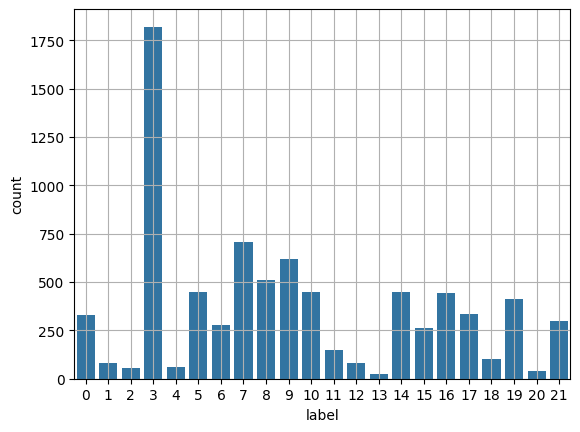

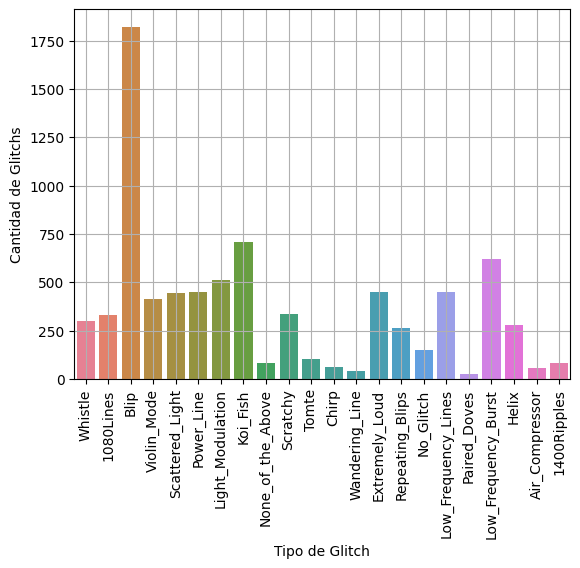

In [ ]:

df1=df.copy() #Variable que contiene una copia del data set original para modoficar ni alterar este mismo
df1['peak_time']=df1['peak_time'].astype(float) 
#Cambio del tipo de dato a flotante 
df1['param_one_value'].dtype 
#verificando que los parametros de entrada para entrenamiento sean de tipo flotante
encoder=LabelEncoder() 
#Aplicación del LabelEncoder para asignar a variables categoricas, valores numericos 
df1['label']=encoder.fit_transform(df1['label'])
plt.figure(2)
sns.countplot(data=df,x='label',palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Glitch')
plt.ylabel('Cantidad de Glitchs')
plt.grid('on')
plt.show()


In [ ]:
# NO COLOCAR 
conteo=df['label'].value_counts()
Ctotal=conteo.get( '1400Ripples',0)
print(Ctotal)

81


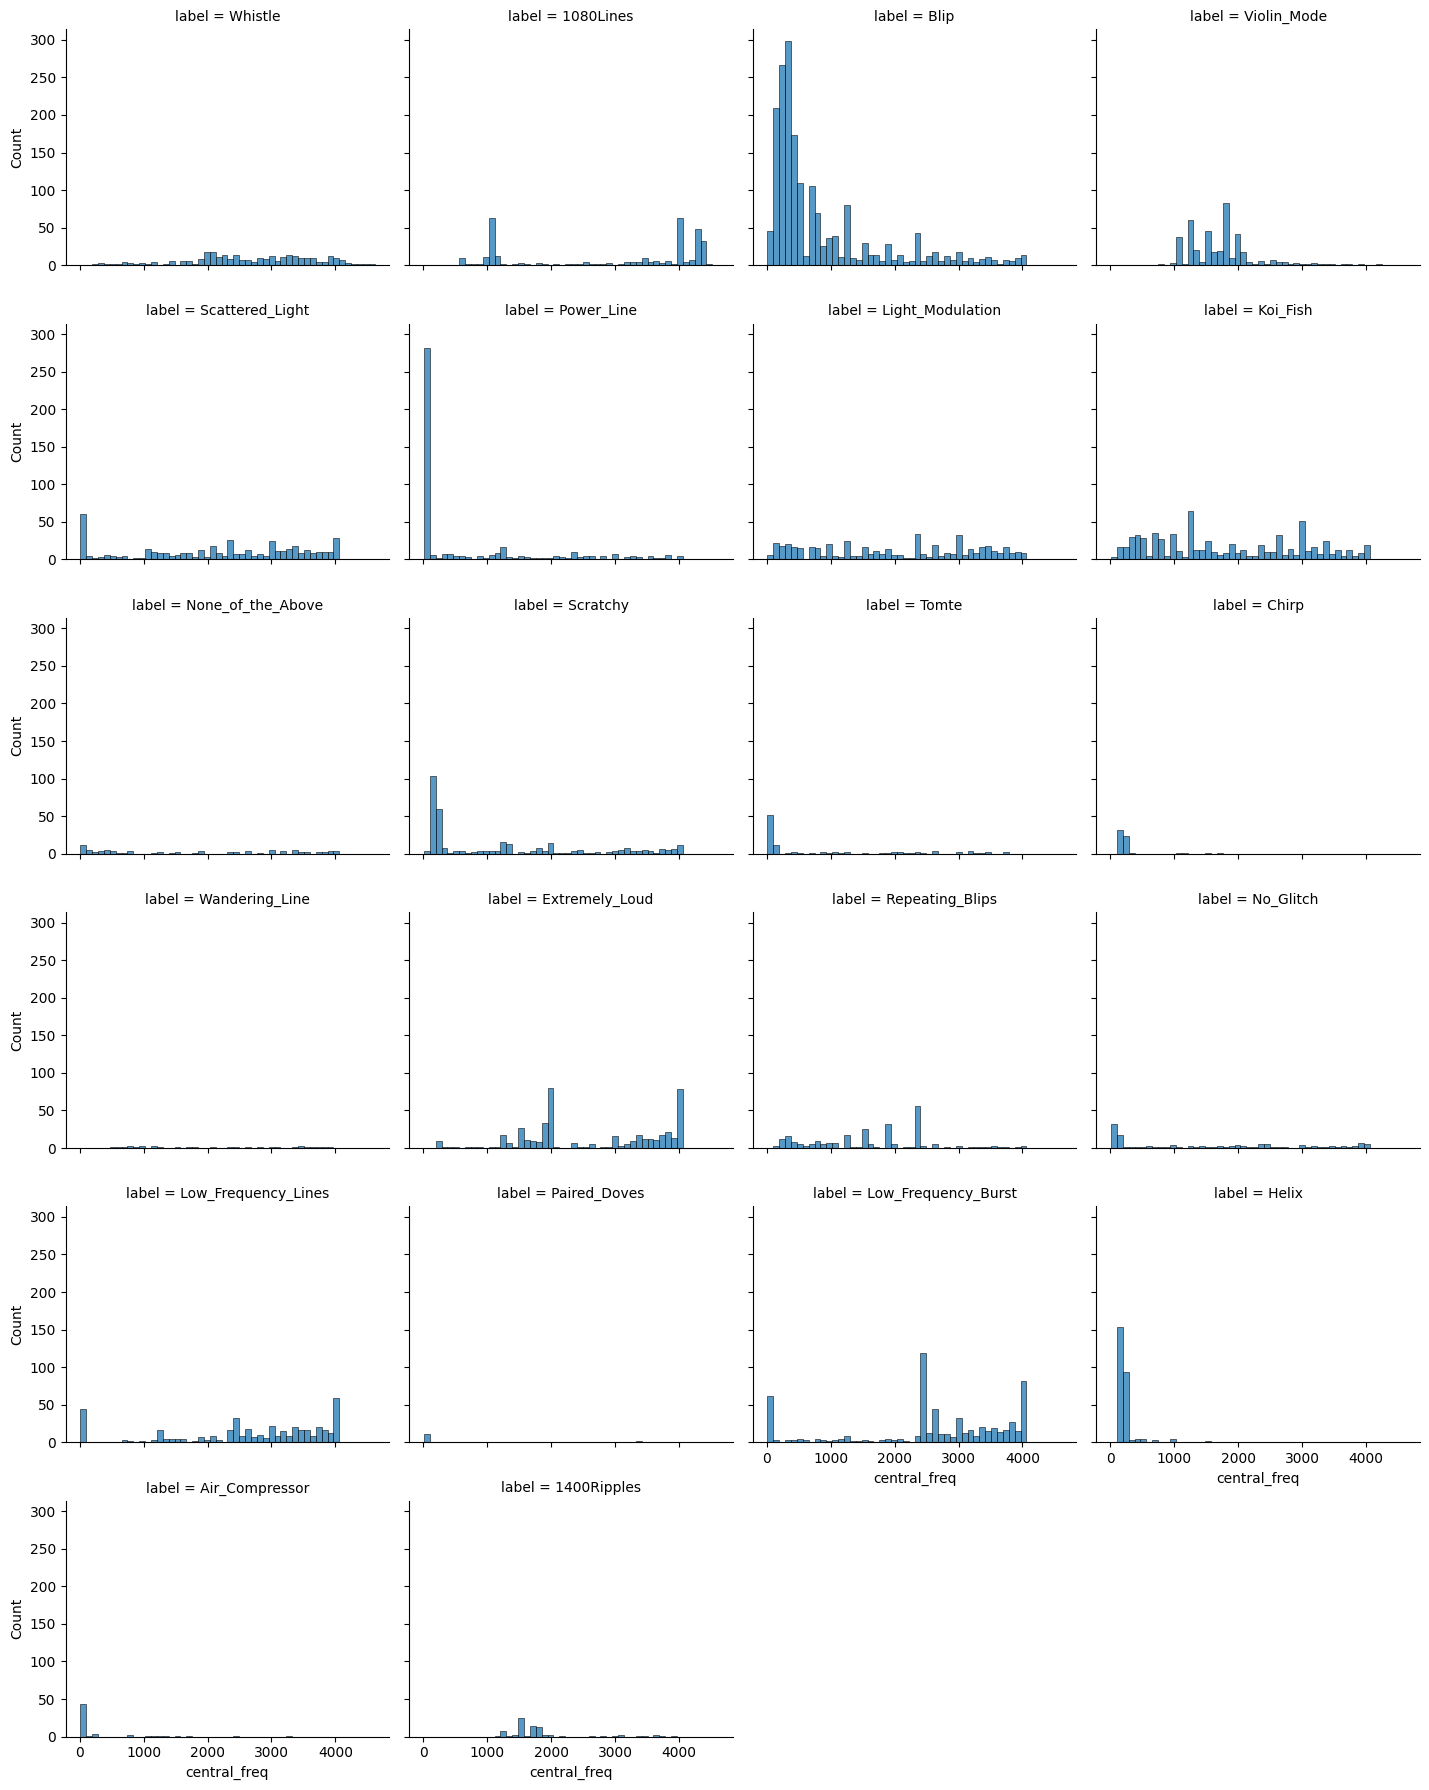

In [ ]:
# NO COLOCAR 
sns.displot(
    data=df,
    x='central_freq',
    col='label',
    col_wrap=4,
    bins=50,
    height=3,
    aspect=1.2,
    facet_kws={'sharex':True, 'sharey':True}
)
plt.tight_layout()
plt.show()

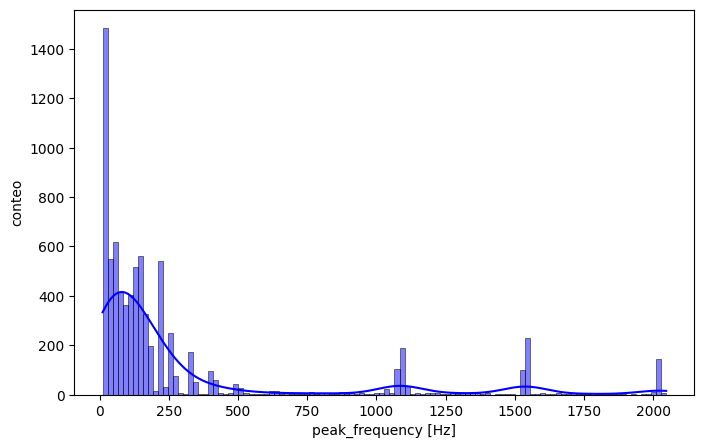

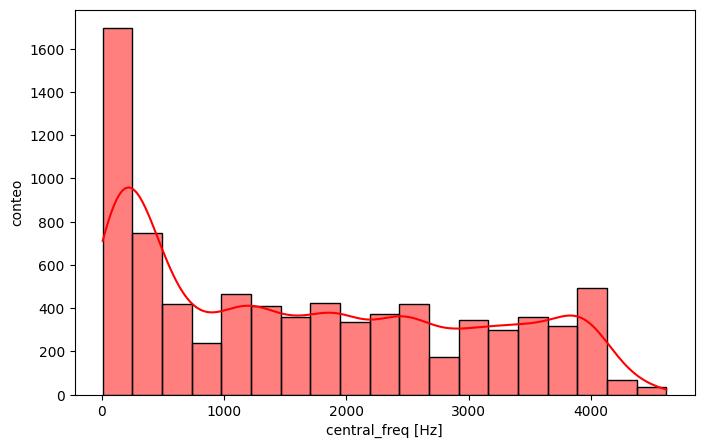

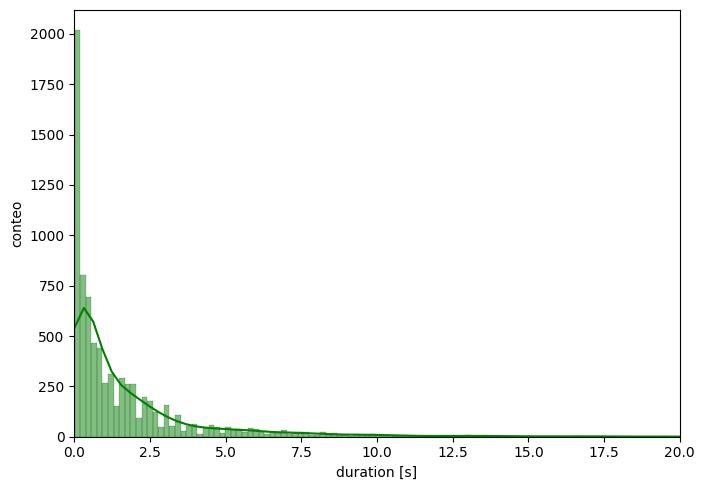

In [ ]:
# Histogramas de parametros considerados como principales de los glitch's
plt.figure(figsize=(8,5))
sns.histplot(data = df, x="peak_frequency",kde=True,color='blue')
# Funcion de seaborn que hace un histograma del parametro "x" elegido del data set
plt.xlabel('peak_frequency [Hz]')
plt.ylabel('conteo')
plt.figure(figsize=(8,5))
sns.histplot(data = df, x="central_freq",kde=True, color='red')
plt.xlabel('central_freq [Hz]')
plt.ylabel('conteo')
plt.figure(figsize=(7.15,5))
sns.histplot(data = df, x="duration",kde=True, color='green')
plt.xlabel('duration [s]')
plt.ylabel('conteo')
plt.xlim(0, 20)   
plt.tight_layout()
plt.show()

<Figure size 1200x300 with 0 Axes>

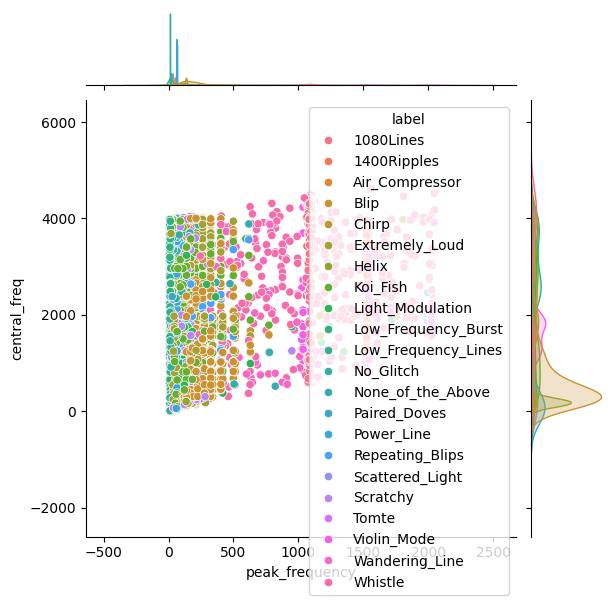

In [ ]:
#NO COLOCAR
df_pv=df.copy()
df_pv['label']=df_pv['label'].astype('category')
df_pv['label'].cat.categories

plt.figure(figsize=(12,3))
sns.jointplot(data=df_pv, x="peak_frequency", y="central_freq",hue='label') #intento de relación entre parametros ( no es posible ya que los datos no poseen una linea evolutiva, tammpoco de cada glitch)
plt.show()

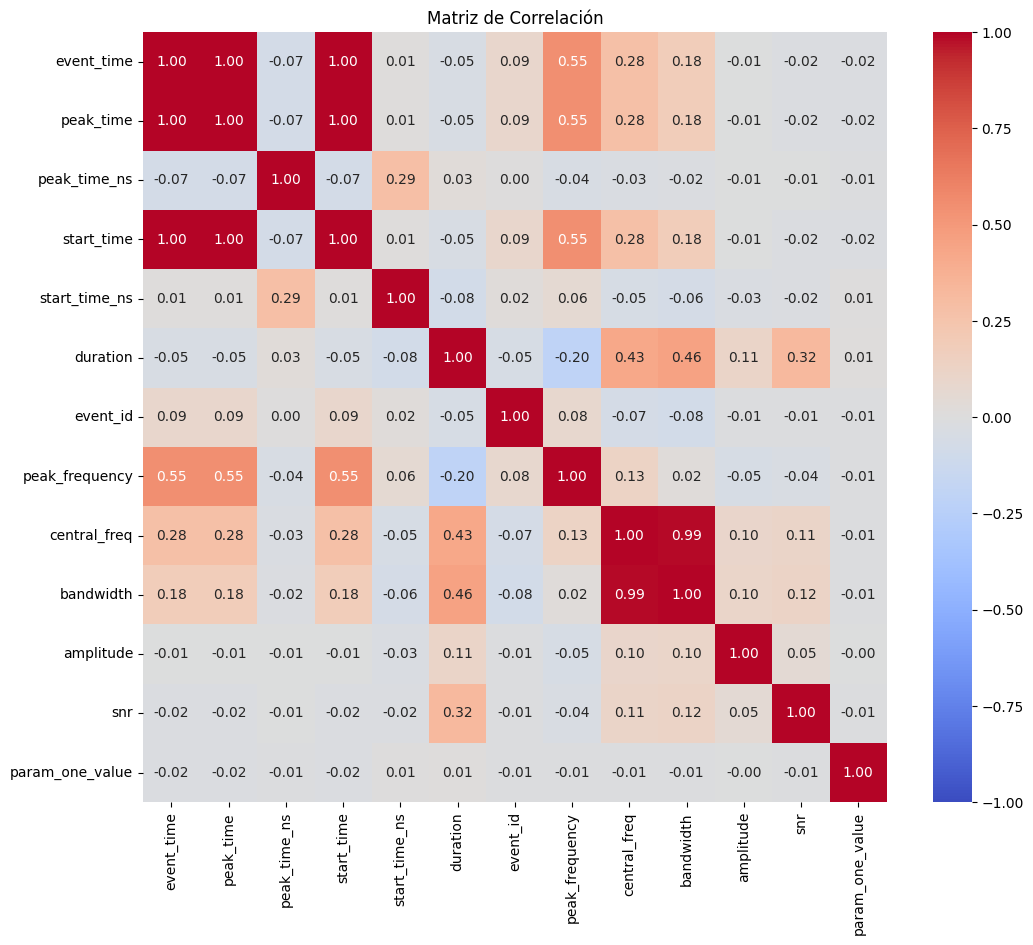

In [ ]:
# MATRIZ DE CORRELACIÓN 
df_corre=df.copy()
variable_cate=df_corre.select_dtypes(include=['float64','int64']) 
# Selección de todos los parametros que alberguen información de tipo entero o flotante
correlacion=variable_cate.drop(columns=['process_id','confidence','chisq','chisq_dof']).corr()
# Borra los parametros irrelevantes en este analisis y aplica la funcción de correlación para 
# la posterior visualización de la matriz 
plt.figure(figsize=(12,10))
sns.heatmap(data=correlacion,vmin=-1,vmax=1,center=0,annot=True,fmt=".2f",cmap='coolwarm')
# mapa de calor para ver el nivel o grado de correlación entre parametros 
plt.title('Matriz de Correlación')
plt.show()


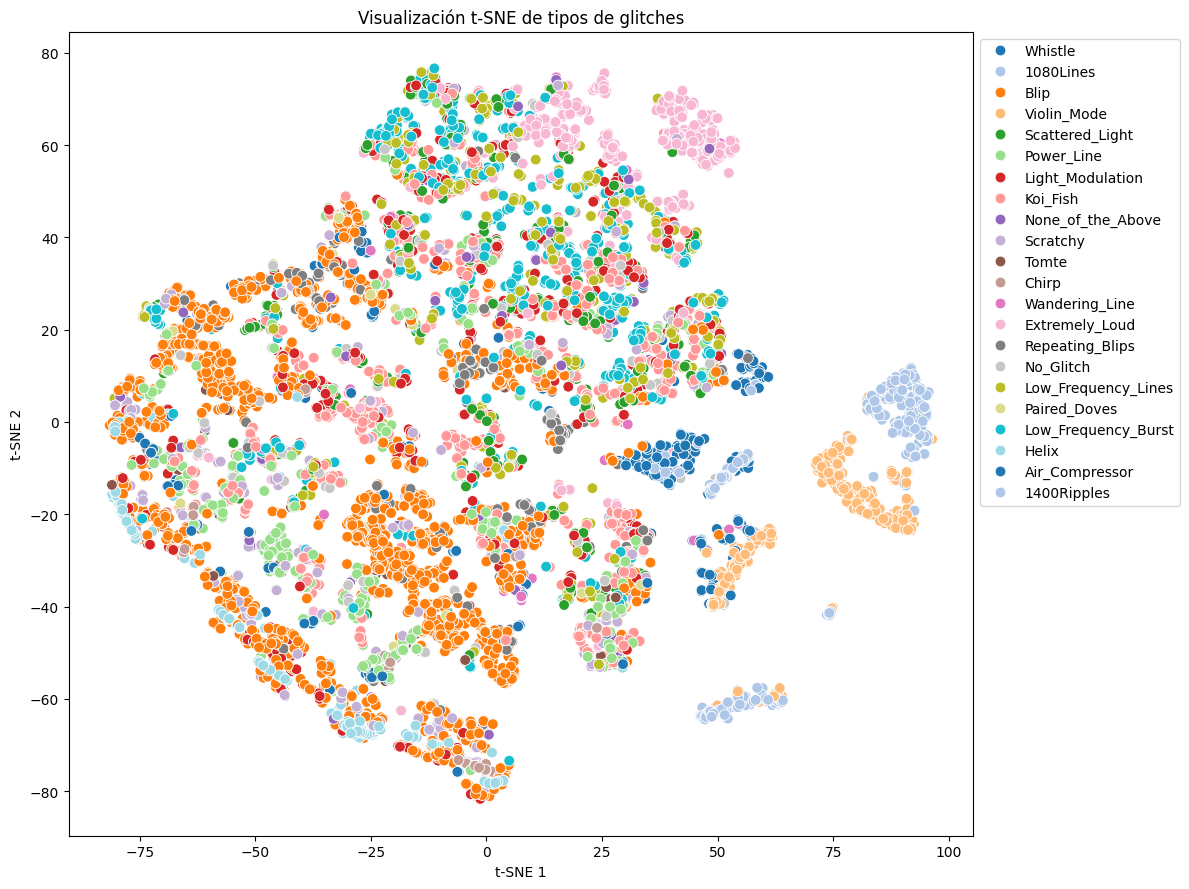

In [ ]:
# Aplicación de t-SNE
x11=df_corre.drop(columns=['label','ifo','search','process_id','event_id','channel','confidence','chisq','chisq_dof', 'param_one_name', 'param_one_value', 'gravityspy_id', 'sample_type', 'url1', 'url2', 'url3', 'url4'])
# Eliminación de los parametros que no aportan en la visualización t-SNE
x11_scaled=StandardScaler().fit_transform(x11)
# Escalado del data set x11
tsne=TSNE(n_components=2,random_state=42,perplexity=30) 
x11_tsne=tsne.fit_transform(x11_scaled)
plt.figure(figsize=(12,9))
sns.scatterplot(x=x11_tsne[:,0],y=x11_tsne[:,1],hue=df_corre['label'],palette='tab20',s=60)
plt.title("Visualización t-SNE de tipos de glitches")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [16]:
display(df)

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,peak_frequency,central_freq,bandwidth,channel,amplitude,snr,confidence,chisq,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,1337.695312,1120.043213,573.363953,GDS-CALIB_STRAIN,1.197650e-22,7.511390,0,0,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,654.747681,1823.073364,3426.576416,GDS-CALIB_STRAIN,8.255850e-23,9.630130,0,0,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,1337.827515,2024.177490,3778.701904,GDS-CALIB_STRAIN,9.762940e-22,15.371040,0,0,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,1182.974609,3981.774658,7492.717773,GDS-CALIB_STRAIN,1.462120e-22,10.321160,0,0,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,1456.511353,3979.026855,7942.912109,GDS-CALIB_STRAIN,4.038300e-22,14.380160,0,0,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,1.127688e+09,L1,1127688297,710937023,1127688292,0,9.00391,Omicron,0,182,41.940331,1972.764160,3881.528320,GDS-CALIB_STRAIN,2.120510e-19,1033.286987,0,0,0,phase,-2.48491,K4lUik19zL,Extremely_Loud,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7962,1.128422e+09,L1,1128421736,324218034,1128421736,304687023,0.03906,Omicron,0,396,134.965424,202.500534,170.593903,GDS-CALIB_STRAIN,5.184990e-22,8.623000,0,0,0,phase,1.32651,EkRSkrpPet,Helix,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7963,1.164774e+09,H1,1164773536,433593034,1164773535,911376953,1.16675,OMICRON,0,1817,1085.830078,4001.193115,7898.579102,GDS-CALIB_STRAIN,4.994010e-22,19.424089,0,0,0,phase,2.72929,xyLhvRKzzX,1080Lines,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7964,1.163790e+09,L1,1163789867,496093034,1163789867,476562023,0.10156,OMICRON,0,501,1035.676880,2051.402832,2131.378662,GDS-CALIB_STRAIN,2.744010e-22,8.651070,0,0,0,phase,0.66486,lshKvhcRcT,Violin_Mode,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes

# RANDOM FOREST

In [ ]:

x=df1[['snr','peak_time','duration','param_one_value','central_freq','bandwidth','event_time','peak_frequency']] 
# features o parametros explicativas con las que estudia el modelo.
y=df1['label']
# etiqueta que contiene el tipo de glitch
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scal=StandardScaler()
x_train_encode=scal.fit_transform(x_train)
x_test_encode=scal.transform(x_test)
model=RandomForestClassifier(n_estimators=100,max_features='log2',random_state=42) 
#para n_estimators=10, accuracy variable es de 99.36
model.fit(x_train,y_train) 
y_pred=model.predict(x_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.4f}")
y_pred_train = model.predict(x_train)
accuracy = sum(y_pred_train == y_train) / len(y_pred_train)
print(f"Train Accuracy: {100 * accuracy:.2f}%")

Precisión del modelo: 0.9109
Train Accuracy: 100.00%


In [18]:
display(x_train_smote.shape)

(32054, 8)

In [ ]:
# VALIDACIÓN DE HIPER PARAMETROS 

rf = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',   
    cv=5,                 
    n_jobs=-1,            
    verbose=2
)


grid_search.fit(x_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor score en CV:", grid_search.best_score_)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score en CV: 0.8383488415057574


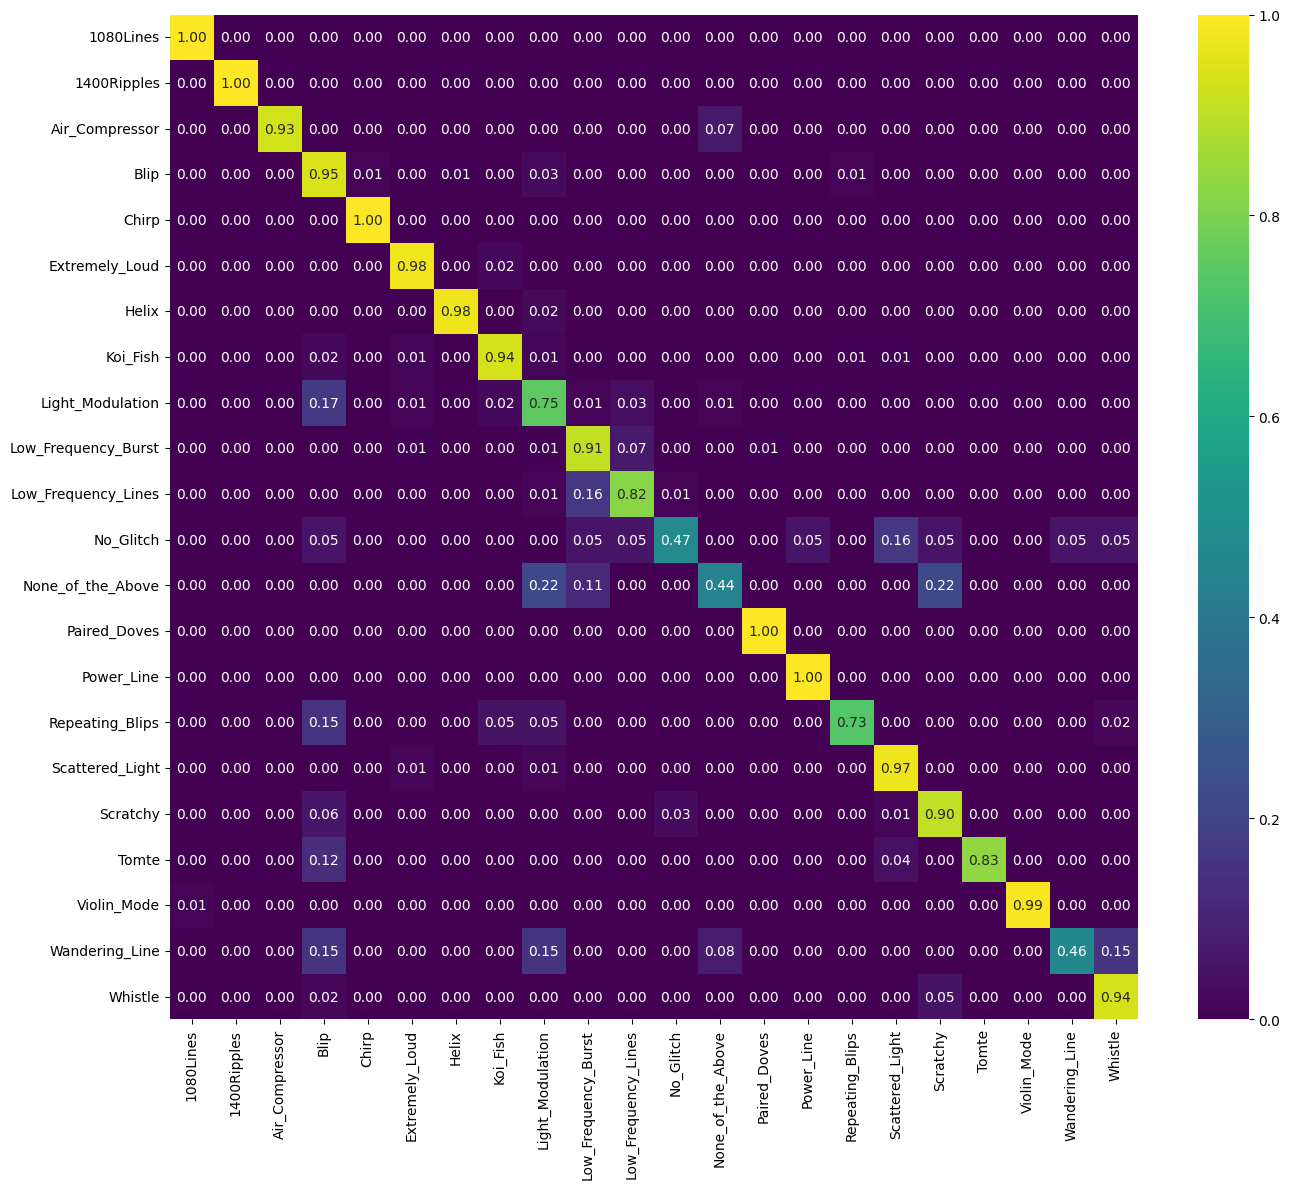

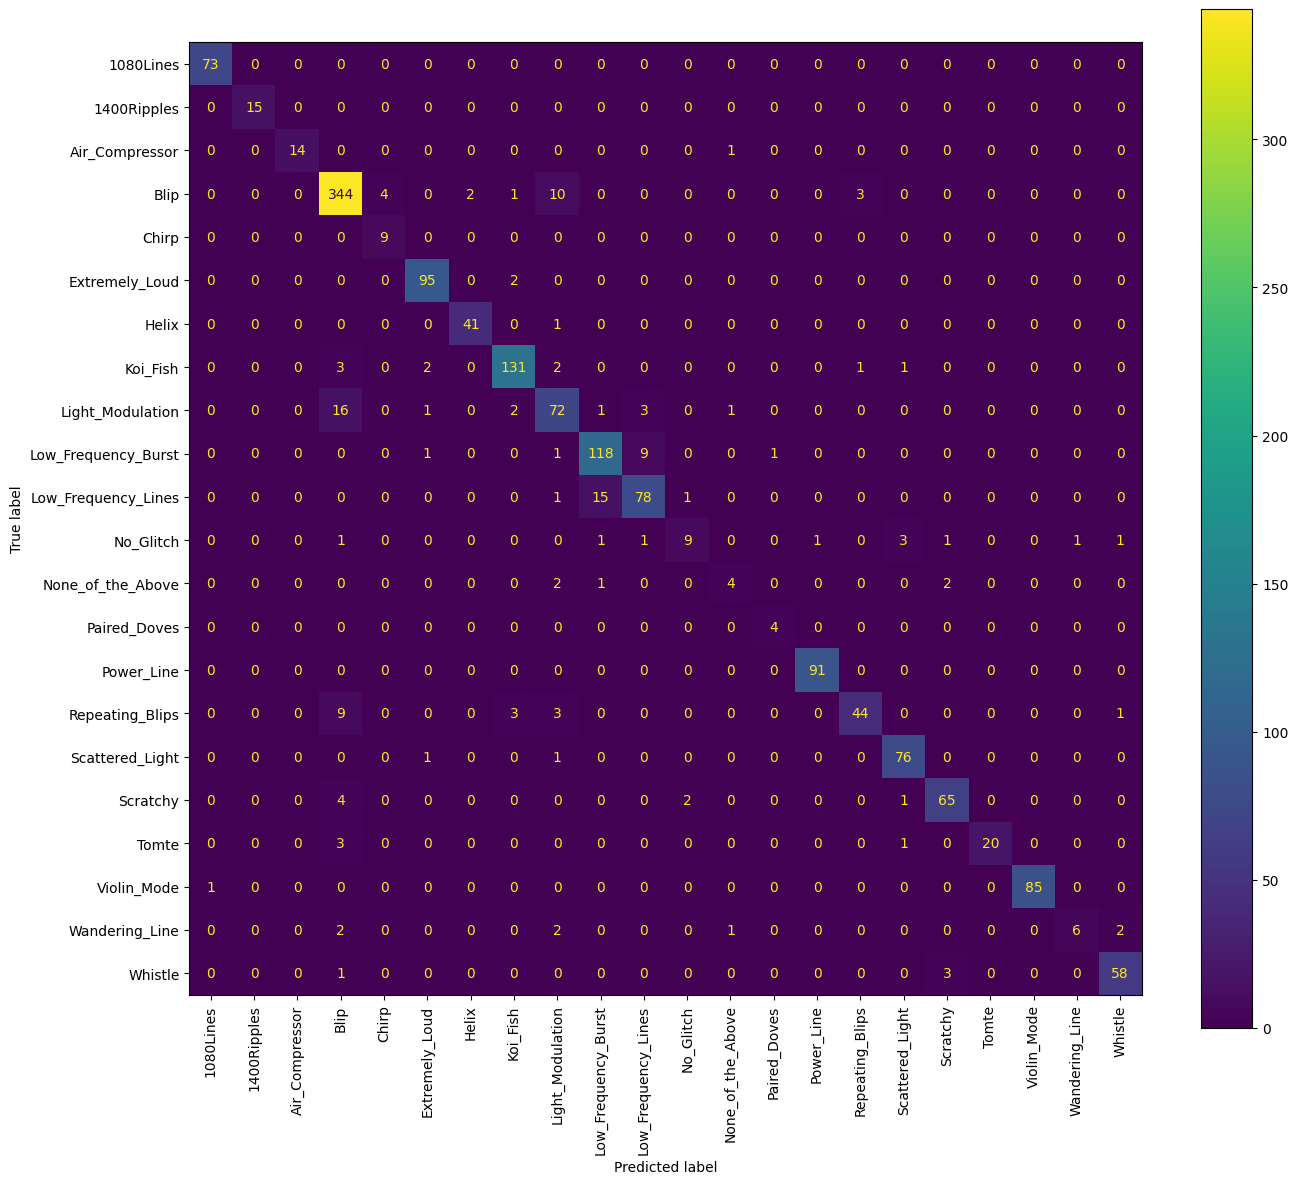

In [ ]:

# MATRIZ DE CONFUSIÓN 
y_enco=encoder.fit_transform(df['label'])
class_name=encoder.classes_
cm=confusion_matrix(y_test,y_pred)
cmN=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

fig,ax=plt.subplots(figsize=(14,12))

sns.heatmap(cmN,annot=True,fmt='.2f',cmap='viridis',xticklabels=class_name,yticklabels=class_name)
plt.tight_layout()
plt.show()
fig,ax=plt.subplots(figsize=(14,12))
vis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_name)
vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
plt.tight_layout()
plt.show()
# matriz de confusión, los datos en fila representan los datos reales que fueron clasificados como otros, y las columnas son los datos erroneos que 
#fueron predecidos como la etiqueta que se está mirando

In [ ]:

# REPORTE DE CLASIFICACIÓN 
report=classification_report(y_test,y_pred,target_names=class_name,output_dict=True)
reportdf=pd.DataFrame(report).transpose()
reportdf_classes=reportdf.iloc[:,-3]
Latex_t=reportdf.sort_values(by='f1-score',ascending=False).to_latex()
print(reportdf.sort_values(by='f1-score',ascending=False))


                     precision    recall  f1-score      support
1400Ripples           1.000000  1.000000  1.000000    15.000000
Power_Line            0.989130  1.000000  0.994536    91.000000
Violin_Mode           1.000000  0.988372  0.994152    86.000000
1080Lines             0.986486  1.000000  0.993197    73.000000
Air_Compressor        1.000000  0.933333  0.965517    15.000000
Helix                 0.953488  0.976190  0.964706    42.000000
Extremely_Loud        0.950000  0.979381  0.964467    97.000000
Scattered_Light       0.926829  0.974359  0.950000    78.000000
Koi_Fish              0.942446  0.935714  0.939068   140.000000
Whistle               0.935484  0.935484  0.935484    62.000000
Blip                  0.898172  0.945055  0.921017   364.000000
accuracy              0.910916  0.910916  0.910916     0.910916
Scratchy              0.915493  0.902778  0.909091    72.000000
Tomte                 1.000000  0.833333  0.909091    24.000000
weighted avg          0.910447  0.910916

In [ ]:
# descripción de la tabla de reporte de clasificación
reportdf.describe()

,precision,recall,f1-score,support
count,25.000000,25.000000,25.000000,25.000000
mean,0.891143,0.867241,0.872467,191.316437
std,0.106453,0.170589,0.133624,428.489856
min,0.571429,0.444444,0.500000,0.910916
25%,0.857143,0.833333,0.838710,15.000000
50%,0.915493,0.933333,0.909091,72.000000
75%,0.953488,0.979381,0.964467,96.000000
max,1.000000,1.000000,1.000000,1594.000000


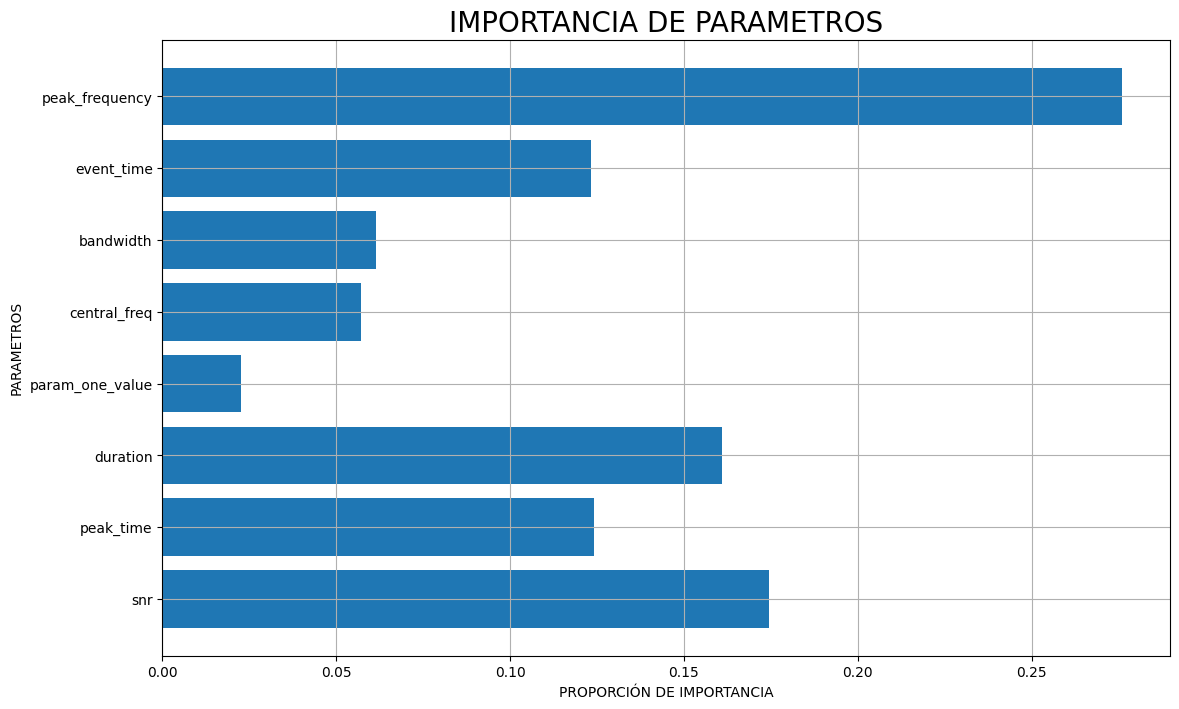

In [ ]:
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
plt.figure(figsize=(13, 8))
xcolum=x.columns
caract=xcolum.shape[0]
plt.barh(range(caract), model.feature_importances_)
plt.yticks(np.arange(caract), xcolum)
plt.grid()
plt.xlabel('PROPORCIÓN DE IMPORTANCIA')
plt.ylabel('PARAMETROS')
plt.title('IMPORTANCIA DE PARAMETROS', fontsize=20)
plt.show()

# CLASIFICADOR POR REDES NEURONALES 


In [ ]:
X=df1[['peak_time','duration','param_one_value','central_freq','bandwidth','event_time','peak_frequency']] # features" o "variables explicativas. Datos introducidos demas "peak_time_ns,start_time,start_time_ns"
Y=df1['label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
Y_train_int=encoder.fit_transform(Y_train)
Y_test_int=encoder.transform(Y_test)
classname=encoder.classes_
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
smote=SMOTE(sampling_strategy='auto',random_state=42)
under=RandomUnderSampler(sampling_strategy={3:650})
X_train_smot,Y_train_smot=smote.fit_resample(X_train_scaled,Y_train_int)
numclass=len(classname)
Y_train_oneH=to_categorical(Y_train_smot, num_classes=numclass)########     
Y_test_oneH= to_categorical(Y_test_int, num_classes=numclass)


modelo=Sequential()
modelo.add(Dense(1024, input_dim=X_train.shape[1],activation='relu')) 
# Capas "input_dim" es la cantidad de dimensiones o clumnas que tienen los datos ahora mismo y que usamos
modelo.add(BatchNormalization())  # Normaliza activaciones
modelo.add(Dropout(0.2)) 
modelo.add(Dense(512, input_dim=X_train.shape[1],activation='relu')) 
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))  # Desactiva 20% de las neuronas
modelo.add(Dense(256, activation='relu'),)
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(128, activation='relu'))
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation='relu'))
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(32, activation='relu'))
modelo.add(BatchNormalization())  
modelo.add(Dropout(0.2))
modelo.add(Dense(22, activation='softmax'))  

# COMPILACIÓN DEL MODELO 

opti=Adam(learning_rate=0.0005)
modelo.compile(optimizer=opti, loss=CategoricalFocalCrossentropy, metrics=['accuracy'])

c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
print("Distribución original (train):")
print(pd.Series(Y_train_int).value_counts().sort_index())

Distribución original (train):
0      262
1       65
2       46
3     1457
4       48
5      358
6      223
7      565
8      409
9      497
10     357
11     120
12      65
13      22
14     359
15     210
16     354
17     270
18      82
19     330
20      34
21     239
Name: count, dtype: int64


ExactExplainer explainer: 1595it [02:24, 10.26it/s]                          


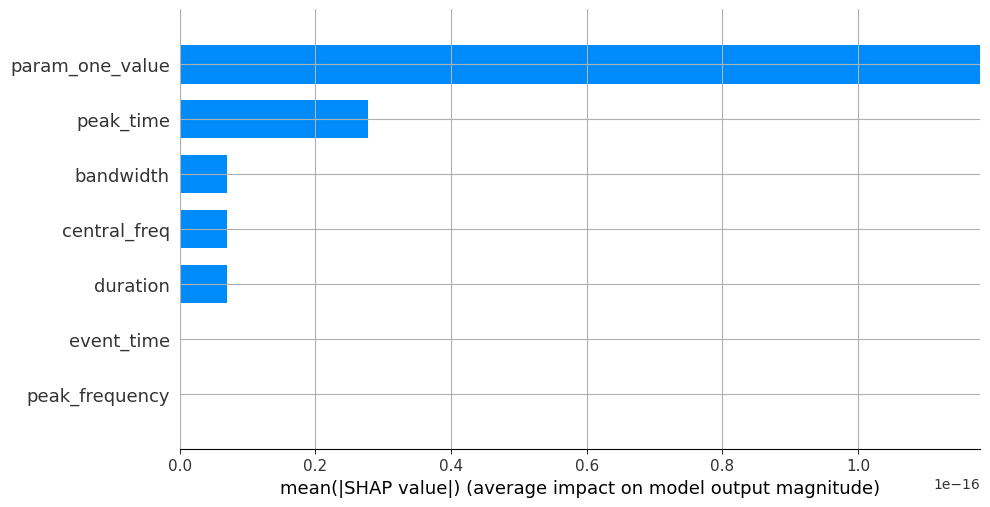

In [ ]:
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
explainer = shap.Explainer(modelo, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=False, plot_size=(10,6))
plt.legend([],[],frameon=False)
plt.grid()
plt.show()


 # ENTRENAMIENTO DEL MODELO 

RECORDAR HACER CNN Y METER EPOCHS 


In [24]:
print(Y_train_under.shape)

(5715, 22)


In [ ]:
# ejecució e historial de aprendizaje del modelo
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
PeClas=class_weight.compute_sample_weight('balanced',y=Y_train)
PeClass={i: max(1.0, PeClas[i]*1.2) for i in range(len(PeClas))} 
history=modelo.fit(X_train_smot,Y_train_oneH, epochs=150, batch_size=256, validation_data=(X_test_scaled, Y_test_oneH), callbacks=[early_stop],class_weight=PeClass)


Epoch 1/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1501 - loss: 1.1049 - val_accuracy: 0.1524 - val_loss: 0.6384
Epoch 2/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3091 - loss: 0.6124 - val_accuracy: 0.2867 - val_loss: 0.5554
Epoch 3/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3817 - loss: 0.4829 - val_accuracy: 0.3450 - val_loss: 0.4796
Epoch 4/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4380 - loss: 0.4027 - val_accuracy: 0.3143 - val_loss: 0.4262
Epoch 5/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4756 - loss: 0.3572 - val_accuracy: 0.3827 - val_loss: 0.3503
Epoch 6/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5032 - loss: 0.3171 - val_accuracy: 0.3808 - val_loss: 0.3260
Epoch 7/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5140 - loss: 0.2990 - val_accuracy: 0.4391 - val_loss: 0.2885
Epoch 8/150
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5326 - loss: 0.2764 - 

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


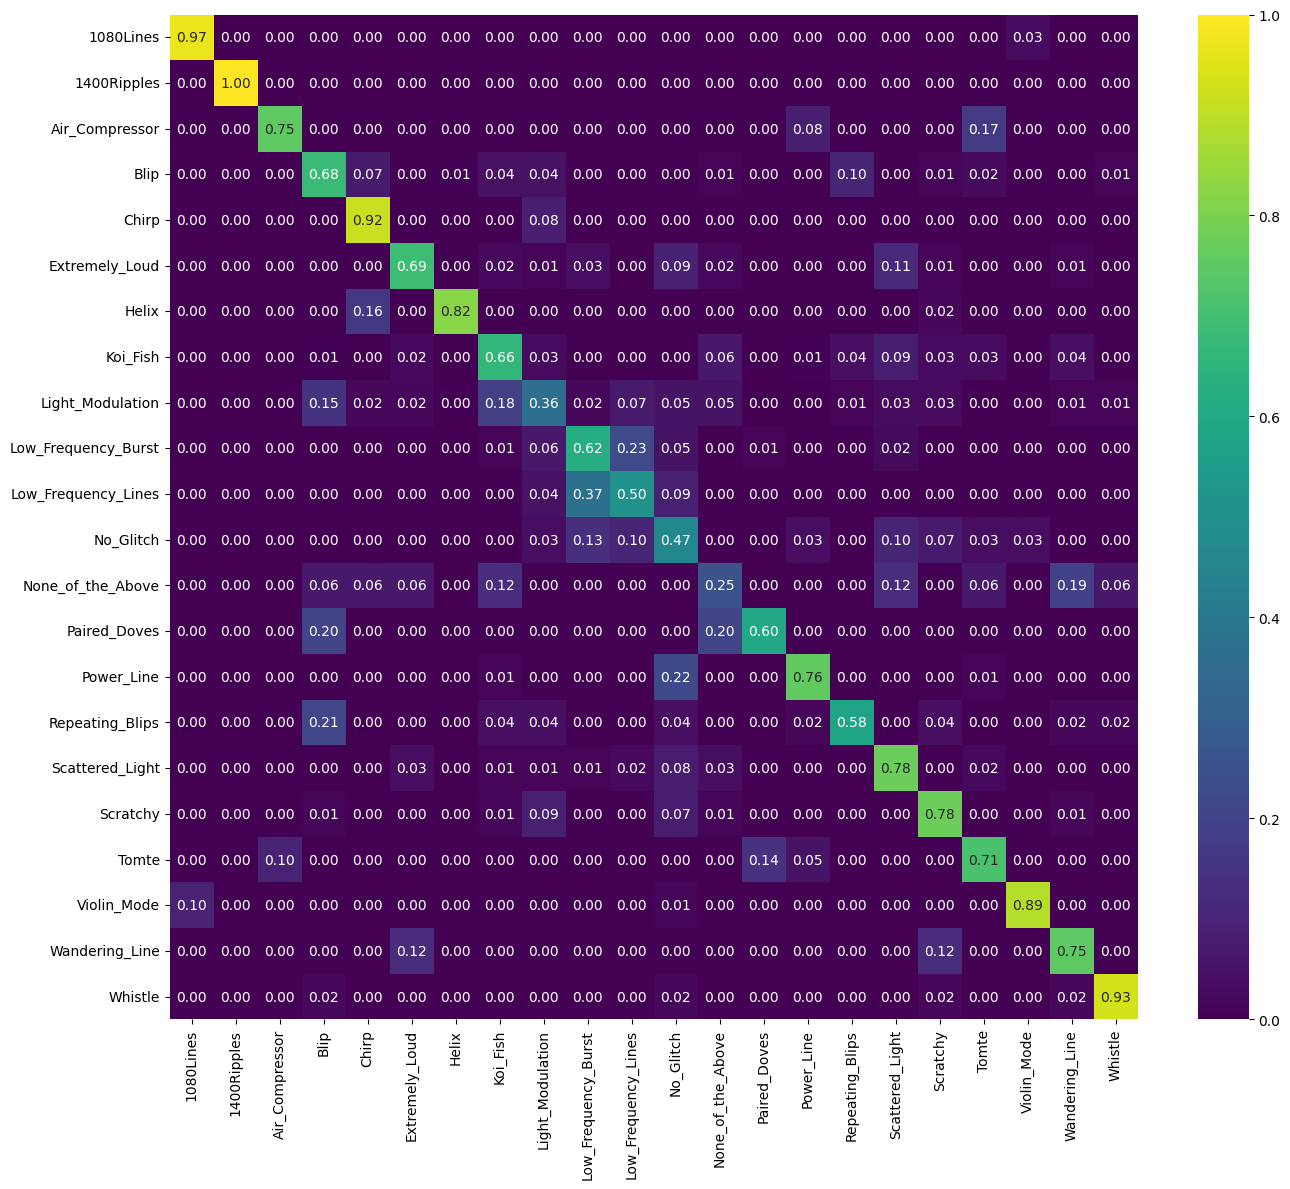

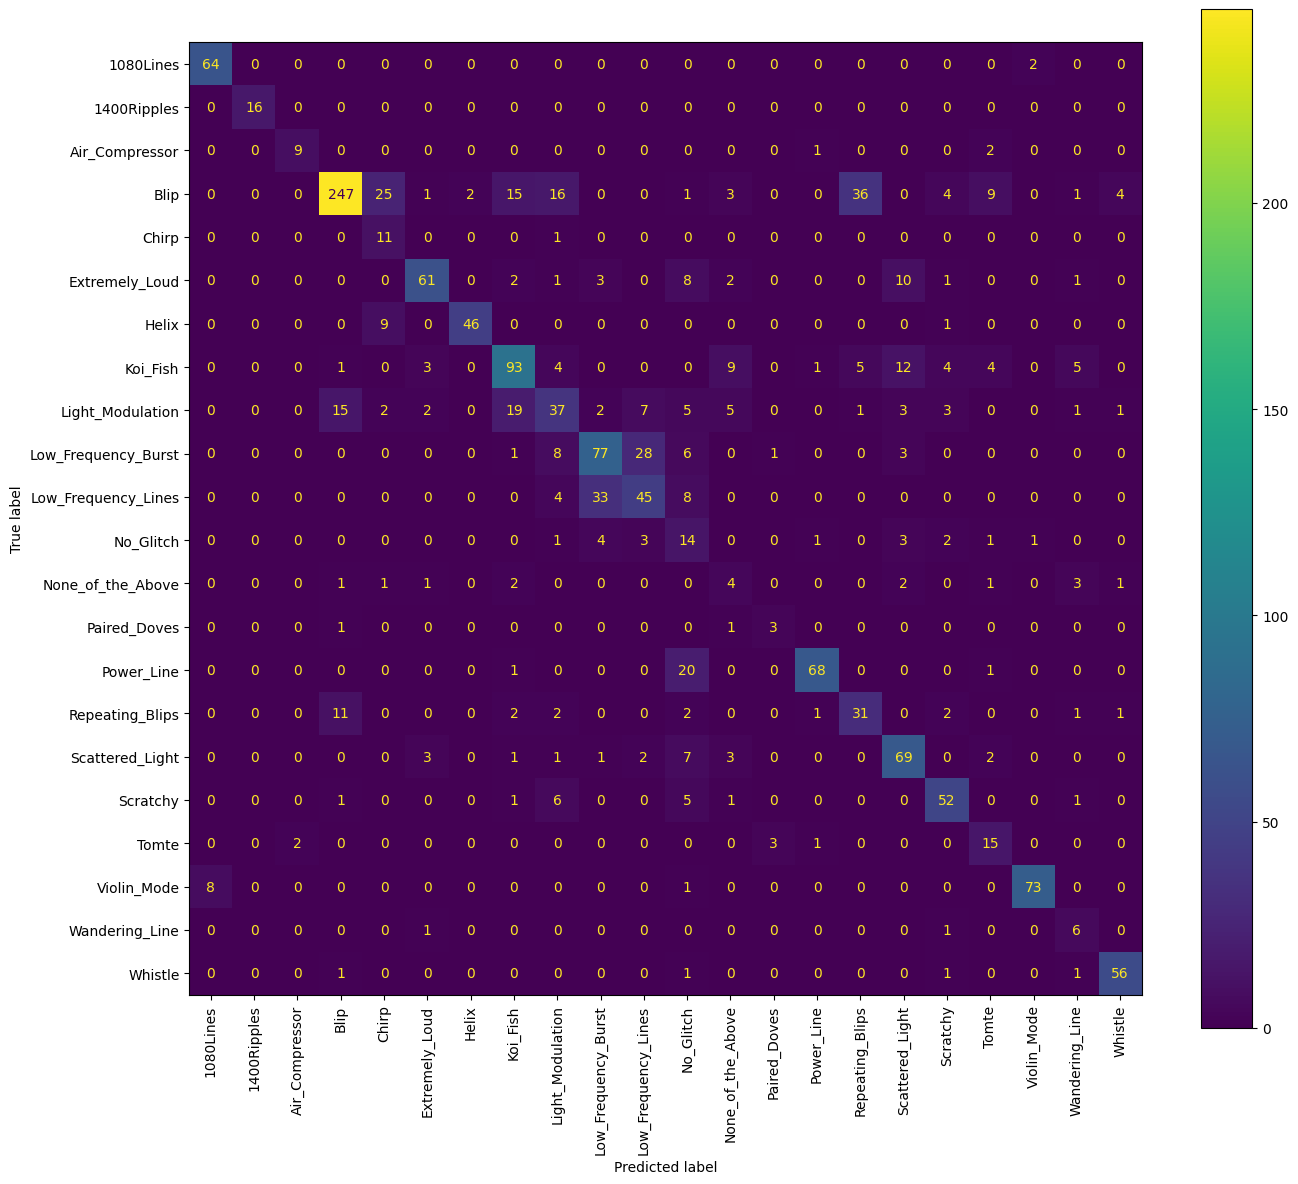

In [ ]:
# MATRIZ DE CONFUSIÓN RED NEURONAL DENSA 

Y_pred=modelo.predict(X_test_scaled)
Y_predar=np.argmax(Y_pred,axis=1)
cmRND=confusion_matrix(Y_test_int,Y_predar)
cmNRND=cmRND.astype('float')/cmRND.sum(axis=1)[:, np.newaxis]
fig,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cmNRND,annot=True,fmt='.2f',cmap='viridis',xticklabels=class_name,yticklabels=class_name)
plt.tight_layout()
plt.show()
fig,ax=plt.subplots(figsize=(14,12))
vis=ConfusionMatrixDisplay(confusion_matrix=cmRND,display_labels=class_name)
vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
plt.tight_layout()
plt.show()

In [ ]:
# CURVA DE ENTRENAMIERNO


def plot_training_curves(history, metrics):

    if isinstance(history, dict):
        history_dict = history
    else:
        history_dict = history.history

    plt.figure(figsize=(12, 5))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i + 1)
        plt.plot(history_dict[metric], label=f'Training {metric}')
        plt.plot(history_dict[f'val_{metric}'], label=f'Validation {metric}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.title(f'Training and Validation {metric.capitalize()}')
        plt.grid()
        plt.legend()
    
    plt.tight_layout()
    plt.show()

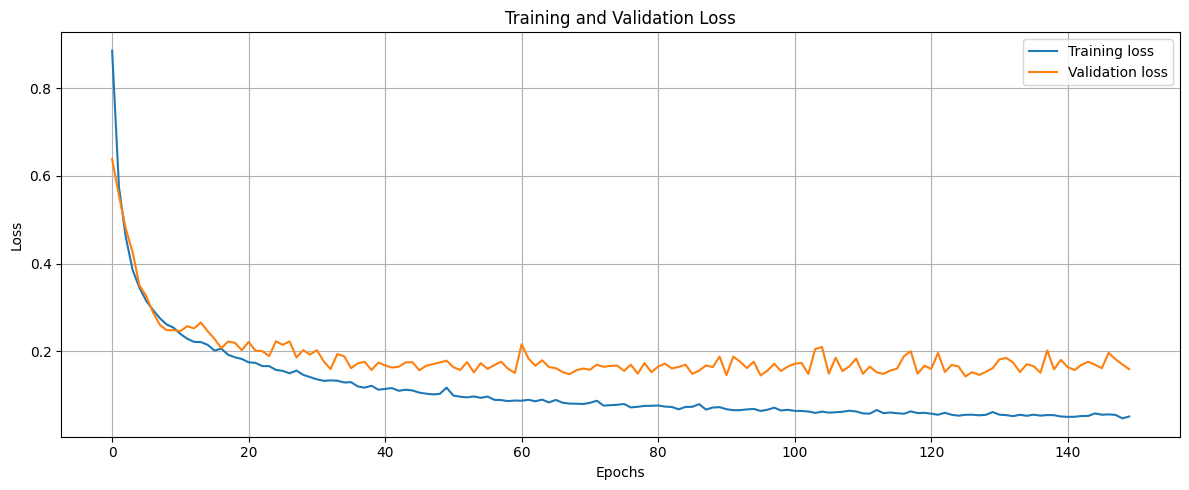

In [13]:
plot_training_curves(history,['loss'])


RELACION PROPORCIONAL ENTRE CANTIDAD DE CAPAS DEMÁS Y EL VALOR EN AUMENTO DEL batch_size

In [ ]:

# REPORTE DE CLASIFICACIÓN 
reportRD=classification_report(Y_test,Y_predar,target_names=class_name,output_dict=True)
reportdfRD=pd.DataFrame(reportRD).transpose()
reportdf_classesRD=reportdfRD.iloc[:,-3]
Latex_RD=reportdfRD.sort_values(by='f1-score',ascending=False).to_latex()
print(reportdfRD.sort_values(by='f1-score',ascending=False))

                     precision    recall  f1-score      support
1400Ripples           1.000000  1.000000  1.000000    16.000000
1080Lines             0.888889  0.969697  0.927536    66.000000
Violin_Mode           0.960526  0.890244  0.924051    82.000000
Whistle               0.888889  0.933333  0.910569    60.000000
Helix                 0.958333  0.821429  0.884615    56.000000
Power_Line            0.931507  0.755556  0.834356    90.000000
Air_Compressor        0.818182  0.750000  0.782609    12.000000
Blip                  0.888489  0.678571  0.769470   364.000000
Extremely_Loud        0.847222  0.685393  0.757764    89.000000
Scratchy              0.732394  0.776119  0.753623    67.000000
Scattered_Light       0.676471  0.775281  0.722513    89.000000
weighted avg          0.739411  0.688206  0.704282  1594.000000
accuracy              0.688206  0.688206  0.688206     0.688206
Koi_Fish              0.678832  0.659574  0.669065   141.000000
macro avg             0.637769  0.702632

In [18]:
reportdfRD.describe()

,precision,recall,f1-score,support
count,25.000000,25.000000,25.000000,25.000000
mean,0.643852,0.701478,0.651520,191.307528
std,0.260398,0.180268,0.217717,428.391187
min,0.142857,0.250000,0.181818,0.688206
25%,0.428571,0.620968,0.500000,16.000000
50%,0.678832,0.702632,0.688206,66.000000
75%,0.888489,0.776119,0.782609,90.000000
max,1.000000,1.000000,1.000000,1594.000000


# XGBOOST


# .....VALIDACIÓN DE HIPERPARAMETROS
BUSCAR MAS DATOS, MAS INFORMACIÓN Y HACER LA VALIDACIÓN DE HIPER PARA HAYAR LA MEJOR COMBINACIÓN

BUSCAR MAS MODELOS AVANZADOS DE REDES AVANZADAS
BUSCAR ARQUITECTURA TRANSFORMER (ADAPTAR A MI CASO) - CON UNA RED PRE-ENTRENADA

c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:40:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Precisión del modelo: 0.9084
Train Accuracy: 99.61%


c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:40:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:40:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:40:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\OSCAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:40:04] WARNING: C:\actions-runner\_work\xg

Cross-Validation Accuracy: 0.9074


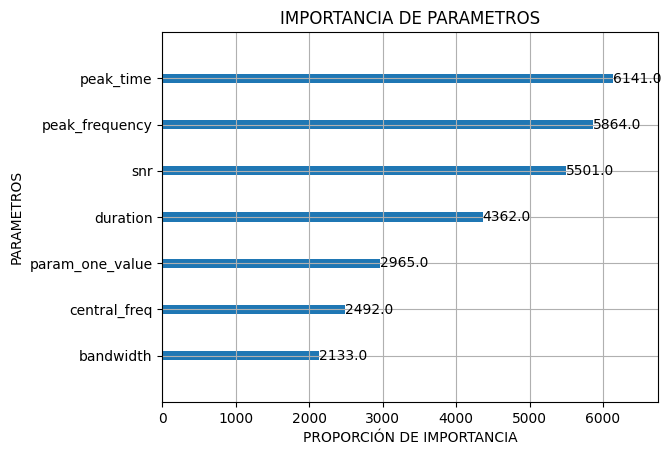

In [ ]:
xx=df1[['snr','peak_time','duration','param_one_value','central_freq','bandwidth','peak_frequency']] 
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,y,test_size=0.2,random_state=42)
Clasificador=XGBClassifier(n_stimators=100,max_depth=6,learning_rate=0.123)
Clasificador.fit(xx_train,yy_train)
y_predec=Clasificador.predict(xx_test)
print(f"Precisión del modelo: {accuracy_score(yy_test, y_predec):.4f}")
y_pred_trainn = Clasificador.predict(xx_train)
accuracy = sum(y_pred_trainn == yy_train) / len(y_pred_trainn)
print(f"Train Accuracy: {100 * accuracy:.2f}%")
scores = cross_val_score(Clasificador, xx, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.4f}")
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
plot_importance(Clasificador, importance_type="weight")
plt.title('IMPORTANCIA DE PARAMETROS')
plt.xlabel('PROPORCIÓN DE IMPORTANCIA')
plt.ylabel('PARAMETROS')
plt.show()

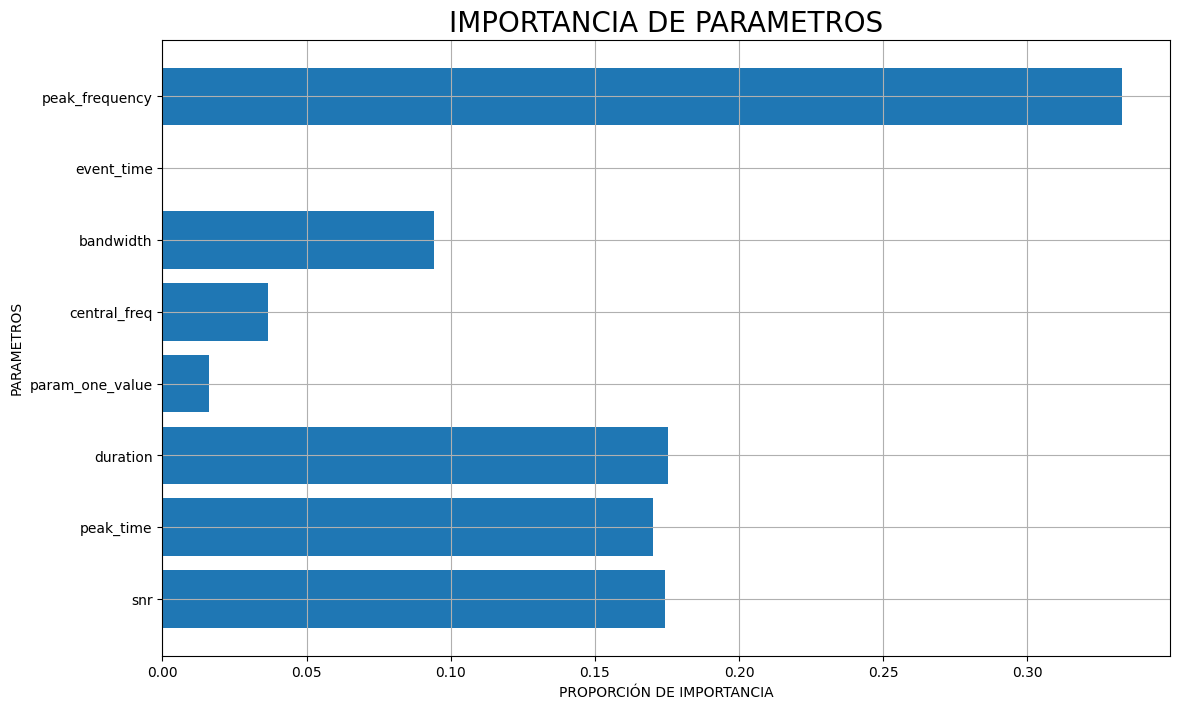

In [ ]:
# Grafica que muestra la importancia o aporte de cada parametro usado en este modelo 
plt.figure(figsize=(13, 8))
xxcolum=xx.columns
caractX=xxcolum.shape[0]
plt.barh(range(caractX), Clasificador.feature_importances_)
plt.yticks(np.arange(caractX), xxcolum)
plt.grid()
plt.xlabel('PROPORCIÓN DE IMPORTANCIA')
plt.ylabel('PARAMETROS')
plt.title('IMPORTANCIA DE PARAMETROS', fontsize=20)
plt.show()

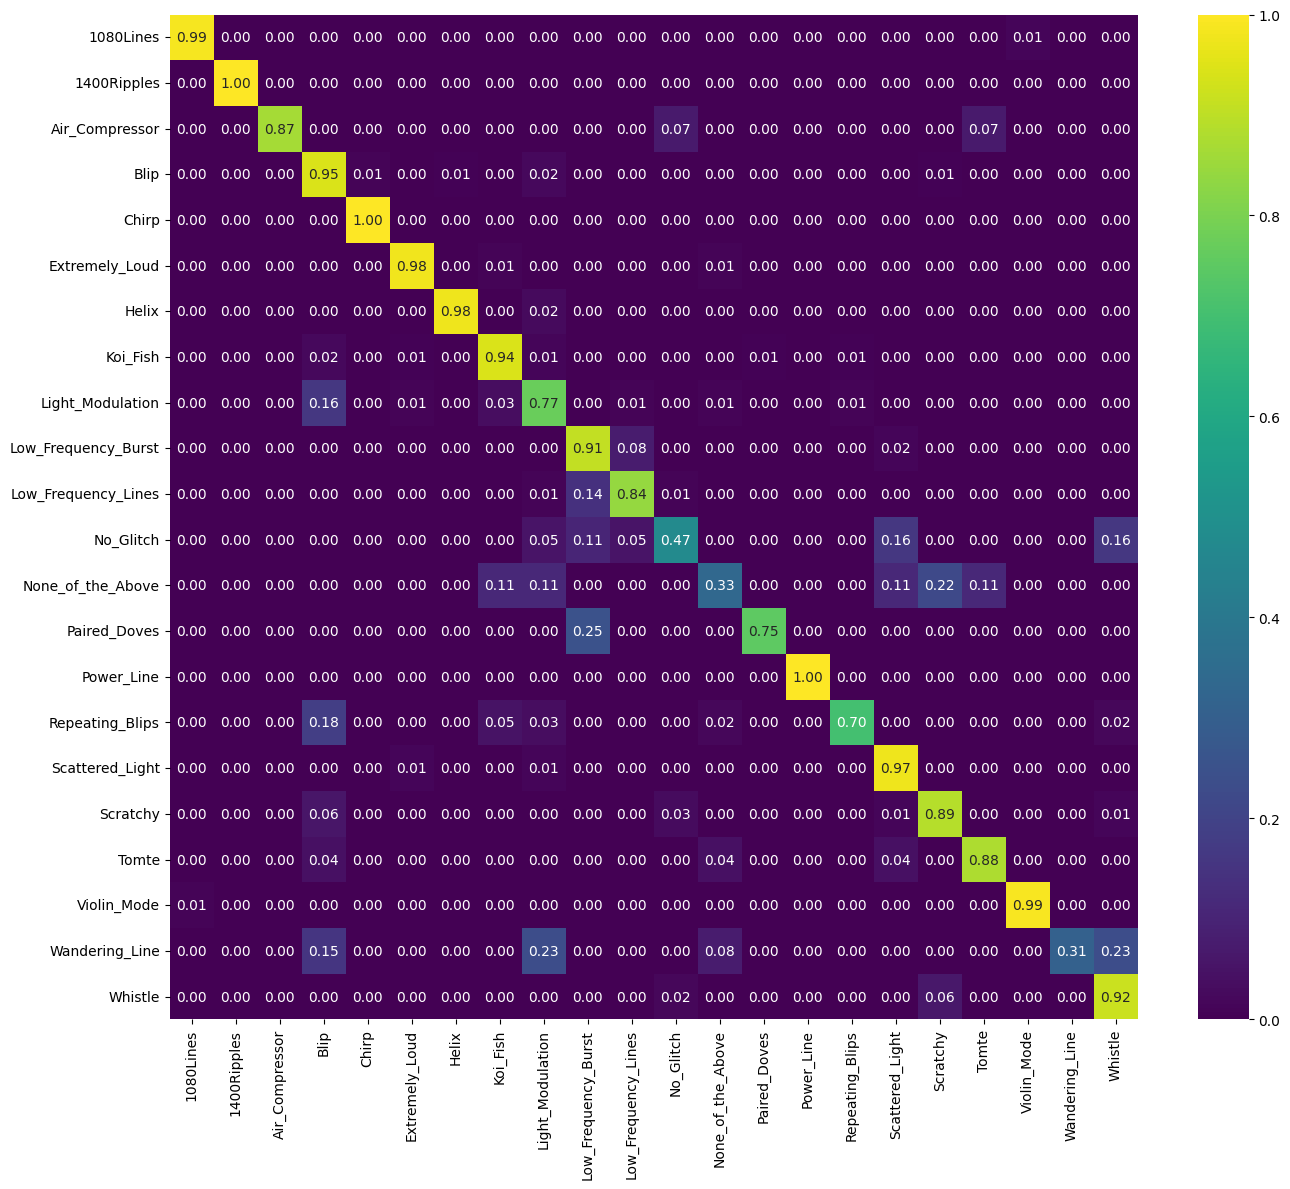

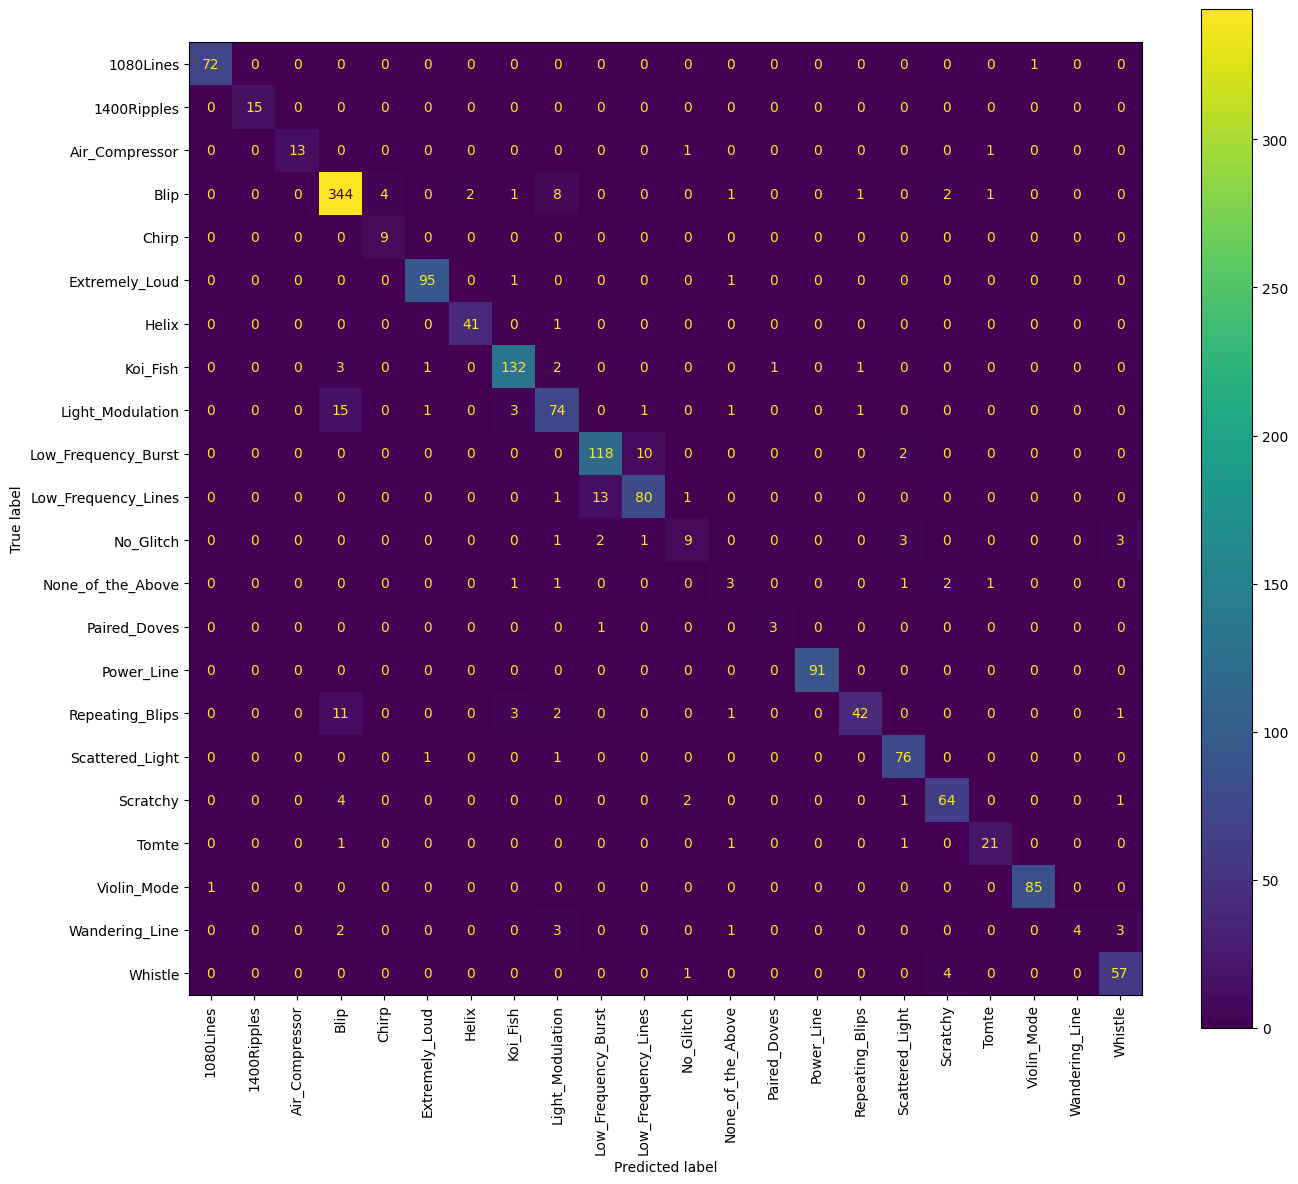

In [ ]:
# MATRIZ DE CONFUSIÓN XGBoost


y_encoXB=encoder.fit_transform(df['label'])
cmXG=confusion_matrix(yy_test,y_predec)
cmNXG=cmXG.astype('float')/cmXG.sum(axis=1)[:, np.newaxis]

fig,ax=plt.subplots(figsize=(14,12))
#plt.title('MATRIZ DE CONFUSIÓN XGBoost')
#vis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_name)
#vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
sns.heatmap(cmNXG,annot=True,fmt='.2f',cmap='viridis',xticklabels=class_name,yticklabels=class_name)
plt.tight_layout()
plt.show()
fig,ax=plt.subplots(figsize=(14,12))
vis=ConfusionMatrixDisplay(confusion_matrix=cmXG,display_labels=class_name)
vis.plot(cmap='viridis',ax=ax,xticks_rotation=90,values_format='d')
plt.tight_layout()
plt.show()

In [ ]:
# REPORTE DE CLASIFICACIÓN
reportXG=classification_report(yy_test,y_predec,target_names=class_name,output_dict=True)
reportdfXG=pd.DataFrame(reportXG).transpose()
reportdf_classesXG=reportdfXG.iloc[:,-3]
Latex_tXG=reportdfXG.sort_values(by='f1-score',ascending=False).to_latex()
print(reportdfXG.sort_values(by='f1-score',ascending=False))

                     precision    recall  f1-score      support
1400Ripples           1.000000  1.000000  1.000000    15.000000
Power_Line            1.000000  1.000000  1.000000    91.000000
Violin_Mode           0.988372  0.988372  0.988372    86.000000
1080Lines             0.986301  0.986301  0.986301    73.000000
Extremely_Loud        0.969388  0.979381  0.974359    97.000000
Helix                 0.953488  0.976190  0.964706    42.000000
Koi_Fish              0.936170  0.942857  0.939502   140.000000
Scattered_Light       0.904762  0.974359  0.938272    78.000000
Air_Compressor        1.000000  0.866667  0.928571    15.000000
Blip                  0.905263  0.945055  0.924731   364.000000
accuracy              0.908407  0.908407  0.908407     0.908407
weighted avg          0.908848  0.908407  0.905928  1594.000000
Whistle               0.876923  0.919355  0.897638    62.000000
Low_Frequency_Burst   0.880597  0.907692  0.893939   130.000000
Scratchy              0.888889  0.888889

In [20]:
reportdfXG.describe()

,precision,recall,f1-score,support
count,25.000000,25.000000,25.000000,25.000000
mean,0.874503,0.843288,0.848401,191.316336
std,0.146952,0.196734,0.167581,428.489902
min,0.333333,0.307692,0.333333,0.908407
25%,0.871536,0.837626,0.818182,15.000000
50%,0.905263,0.908407,0.897638,72.000000
75%,0.969388,0.976190,0.939502,96.000000
max,1.000000,1.000000,1.000000,1594.000000


In [14]:
Clasificador.get_params


<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.123, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, n_stimators=100, ...)>

In [17]:
blip_data = df[df['label'] == 'Light_Modulation'] 
display(blip_data.head())

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,peak_frequency,central_freq,bandwidth,channel,amplitude,snr,confidence,chisq,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
137,1.129625e+09,H1,1129624733,162108898,1129624732,875000000,0.75000,Omicron,0,113,80.666832,809.473389,1554.946655,GDS-CALIB_STRAIN,7.820540e-22,19.916470,0,0,0,phase,-0.39631,veLtXKvm5S,Light_Modulation,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1617,1.134779e+09,H1,1134778592,399414062,1134778591,500000000,4.00000,Omicron,0,62,137.711487,3653.436768,7296.959473,GDS-CALIB_STRAIN,4.909770e-22,54.319580,0,0,0,phase,0.03786,zxALwutVBF,Light_Modulation,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1618,1.127309e+09,H1,1127308687,917236089,1127308687,861327886,0.06445,Omicron,0,119,417.400391,378.457458,638.371704,GDS-CALIB_STRAIN,1.356500e-22,8.538560,0,0,0,phase,2.39125,zkqsD91U1Y,Light_Modulation,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1619,1.136407e+09,H1,1136406856,812500000,1136406855,500000000,4.00000,Omicron,0,154,10.627180,3458.982422,6905.679688,GDS-CALIB_STRAIN,3.604420e-19,27.287310,0,0,0,phase,3.07352,zdtpSQtlCC,Light_Modulation,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1621,1.136514e+09,H1,1136514437,343750000,1136514436,500000000,3.25000,Omicron,0,59,11.318690,2092.189941,4169.156250,GDS-CALIB_STRAIN,1.387360e-19,21.100389,0,0,0,phase,1.85296,zZgnxP2njl,Light_Modulation,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
